In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from PIL import Image
from pylab import *

#import numpy . plot . image . math

In [17]:
"""to do: FRAME
- Create Frame of individual line
- append all the Frame of individual line
"""
angle = 5
width = 640
height = 480


i=1
fline = {}
#fline= np.empty([320,0,2])
while angle*i < 90:
    theta = angle *i
    tan = math.tan(math.radians(theta))
    lr = np.array([[int(width/2)-1,height-1]])
    ll = np.array([[int(width/2)-1,height-1]])
    for iter in range(1,int(width/2)):
        for jter in range(1,height):
            test = np.abs([tan-jter/iter])
            if test[0]<0.01:
                #print(str(iter) +' '+ str(480-jter+1))
                lr = np.append(lr,[[int(width/2+iter-1),height-jter+1-1]],axis=0) 
                ll = np.append(ll,[[int(width/2-iter-1),height-jter+1-1]],axis=0)
                break
            else:
                if not jter==height-1: continue
                lr = np.append(lr,[[int(width/2+iter-1),lr[iter-1,1]]],axis=0)
                ll = np.append(ll,[[int(width/2-iter-1),ll[iter-1,1]]],axis=0)
    #print(lr.shape)
    #fline = np.append(fline,[lr],axis=1)
    fline[str(2*i-1)] = lr
    fline[str(2*i)] = ll
    i = i+1
print("right line :"+str(len(fline.keys()))+', The size of frame: '+str(np.mean([len(fline[key]) for key in fline.keys()])))
#print("left line :"+str(len(flr.keys()))+', The size of frame: '+str(np.mean([len(flr[key]) for key in flr.keys()])))
#flr['1'].shape

right line :34, The size of frame: 320.0


(320, 1)
320


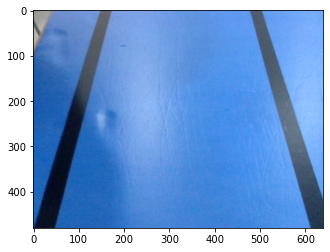

In [32]:
"""to do: Get Data
- import the image
- get the data from each line
- append each line in on numpy array [row = 320 , col = line]
"""
img = np.array(Image.open('image/img20.jpg'))
imshow(img)
data = np.empty([320,0],int)
temp = np.array([[img[y,x,2]] for x,y in fline['1']])
print(temp.shape)
for key in fline.keys():
    data = np.append(data,np.array([[img[y,x,2]] for x,y in fline[key]]),axis=1)
    #data = np.append(data,np.array([[img[y,x,2]] for x,y in fll[key]]),axis=1)

print(len(data))


In [33]:
#(3*np.std(data[0:50,:],axis=0)).shape
a = 0
b = 50

BND = np.zeros([34])
segCal = data[0:50,:]
#print(segCal[:,0])
plusCheck = np.mean(segCal,axis=0) + 3* np.std(segCal,axis=0)
minusCheck = np.mean(segCal,axis=0) - 3* np.std(segCal,axis=0)
test = data[49:60,:]
#print(plusCheck[0],'\n',np.mean(segCal,axis=0)[0],'\n ', minusCheck[0],'\n',test[1,0])
checktop = (test > plusCheck)+(test<minusCheck)
#pos = np.empty([11,0])
index = np.argmax(checktop,axis=0)
tempBND = np.where(index==0,index,index+49)
BND = np.where(BND==0,tempBND,BND)
#for n in data[0,:]:
#    pos = np.append(pos,np.arange(49,60).reshape([11,1]),axis=1)

print(BND)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0. 55.  0.  0. 53.  0.  0. 55. 58.  0.  0.  0.  0.  0.]


In [34]:
"""to do: 3-sigma
- calculate s1 and hd position
- calculating the mean and thrid standard
- comparing operation of the thrid standard and hd data
- posistion the error
- appending the posistion and get corrdinate 
"""
s1 = 50
hd = 11
h1 = 3
BND = np.zeros(data.shape[1])
a = 0
b = s1
while True:
    segCal = data[a:b,:]
    plusCheck = np.mean(segCal,axis=0) + 3* np.std(segCal,axis=0)
    minusCheck = np.mean(segCal,axis=0) - 3* np.std(segCal,axis=0)
    if(b+hd) > len(data): hd = len(data)-b
    test = data[b-1:b+hd,:]
    checktop = (test > plusCheck)+(test<minusCheck)
    index = np.argmax(checktop,axis=0)
    tempBND = np.where(index==0,index,index+(b-1))
    BND = np.where(BND==0,tempBND,BND)
    a= a+h1
    b= b+h1
    if b >len(data): break




    


In [1]:
""" To do : plot the data

"""
plt.plot([datas for datas in data[:,1]],'r:')

NameError: name 'plt' is not defined

(34,)
34


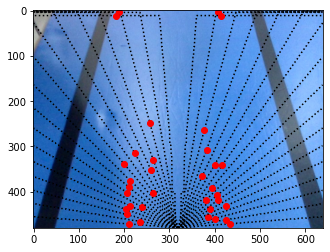

In [35]:
"""to do: ploting 
- plot image
- plot lines
- plot error posistion
- plot center
"""
imshow(img)
print(BND.shape)
print(len(fline.keys()))
for key in fline.keys():
    plt.plot(fline[key][:,0],fline[key][:,1],'k:')
    plt.plot(fline[key][int(BND[int(key)-1]),0],fline[key][int(BND[int(key)-1]),1],'ro')

    



plt.show()